In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
#df = pd.read_json("/content/drive/My Drive/Colab Notebooks/Data Science/dataset/MyData/YourLibrary.json")

In [ ]:
import json
# load data using Python JSON module
with open('/content/drive/My Drive/Colab Notebooks/Data Science/dataset/MyData/YourLibrary.json','r') as f:
    data = json.loads(f.read())
    
# Normalizing data
df = pd.json_normalize(data, record_path =['tracks'])

In [ ]:
df.head()

,artist,album,track,uri
0,DJ Prince,Shaku Shaku,Shaku Shaku,spotify:track:58e3HNBFNiEgc6DSp0fQrE
1,Sexion Mafura,Mabawa,Mabawa,spotify:track:1AZfCfvZEZ2s3nMdBOpwYR
2,Kanye West,Graduation,Stronger,spotify:track:4fzsfWzRhPawzqhX8Qt9F3
3,Akon,Trouble,Locked Up,spotify:track:00BHe2yBtdOzhKPmI7rpTE
4,Christophe Maé,L'attrape-rêves,Il est où le bonheur,spotify:track:1TM73fujNDKSpigPLfxCZm


In [ ]:
len(df)

1060

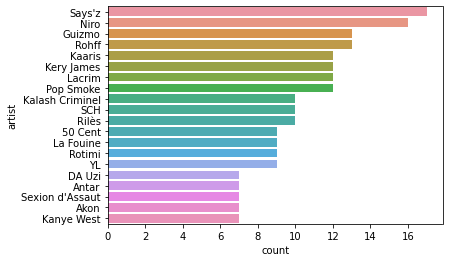

In [ ]:
ax = sns.countplot(y="artist", data=df, order=df['artist'].value_counts().iloc[:20].index)
ax

In [ ]:
df['artist'].value_counts().iloc[:20]

Says'z             17
Niro               16
Guizmo             13
Rohff              13
Kaaris             12
Kery James         12
Lacrim             12
Pop Smoke          12
Kalash Criminel    10
SCH                10
Rilès              10
50 Cent             9
La Fouine           9
Rotimi              9
YL                  9
DA Uzi              7
Antar               7
Sexion d'Assaut     7
Akon                7
Kanye West          7
Name: artist, dtype: int64

In [ ]:
len(df['artist'].unique())

575

In [ ]:
sh1 = pd.read_json("/content/drive/My Drive/Colab Notebooks/Data Science/dataset/MyData/StreamingHistory0.json")
sh2 = pd.read_json("/content/drive/My Drive/Colab Notebooks/Data Science/dataset/MyData/StreamingHistory1.json")
sh3 = pd.read_json("/content/drive/My Drive/Colab Notebooks/Data Science/dataset/MyData/StreamingHistory2.json")

In [ ]:
sh = pd.concat([sh1,sh2,sh3], axis=0)

In [ ]:
sh.head()

,endTime,artistName,trackName,msPlayed
0,2021-03-26 16:41,DMX,What These Bitches Want,140180
1,2021-03-27 01:26,Savage Toddy,Toddy1kenobi,703331
2,2021-03-27 01:27,SCH,Euro,7302
3,2021-03-27 01:29,Regard,Ride It,137423
4,2021-03-27 01:31,Niska,Gnonmi avec lait,92027


In [ ]:
len(sh)

24333

In [ ]:
sh['date'] = pd.to_datetime(sh['endTime']).dt.date
#sh['date'] = pd.to_datetime(sh['date'],format='%Y%m%d')
sh['year'] = pd.DatetimeIndex(sh['date']).year

In [ ]:
sh['year'].value_counts()

2021    18865
2022     5468
Name: year, dtype: int64

In [ ]:
sh.head()

,endTime,artistName,trackName,msPlayed,date,year
0,2021-03-26 16:41,DMX,What These Bitches Want,140180,2021-03-26,2021
1,2021-03-27 01:26,Savage Toddy,Toddy1kenobi,703331,2021-03-27,2021
2,2021-03-27 01:27,SCH,Euro,7302,2021-03-27,2021
3,2021-03-27 01:29,Regard,Ride It,137423,2021-03-27,2021
4,2021-03-27 01:31,Niska,Gnonmi avec lait,92027,2021-03-27,2021


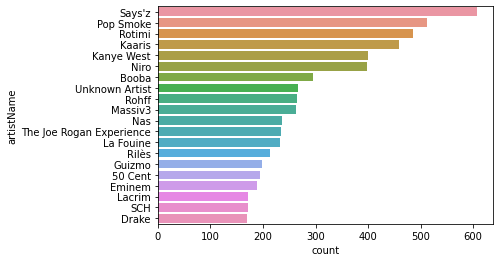

In [ ]:
ax = sns.countplot(y="artistName", data=sh, order=sh['artistName'].value_counts().iloc[:20].index)
ax

In [ ]:
grouped_artist = sh[['artistName', 'trackName']]\
    .groupby('artistName')\
    .count()\
    .sort_values('trackName', ascending=False)\
    .reset_index()
grouped_artist.columns = ['artistName', 'Count']
grouped_artist.head()

,artistName,Count
0,Says'z,607
1,Pop Smoke,513
2,Rotimi,485
3,Kaaris,458
4,Kanye West,400


In [ ]:
sh_2021 = sh[sh['year'] == 2021]
sh_2022 = sh[sh['year'] == 2022]

In [ ]:
grouped_2021 = sh_2021[['artistName', 'trackName']]\
    .groupby('artistName')\
    .count()\
    .sort_values('trackName', ascending=False)\
    .reset_index()
grouped_2021.columns = ['artistName', 'Count']
grouped_2021.head()

,artistName,Count
0,Says'z,471
1,Rotimi,457
2,Pop Smoke,406
3,Kanye West,377
4,Niro,366


In [ ]:
grouped_2022 = sh_2022[['artistName', 'trackName']]\
    .groupby('artistName')\
    .count()\
    .sort_values('trackName', ascending=False)\
    .reset_index()
grouped_2022.columns = ['artistName', 'Count']
grouped_2022.head()

,artistName,Count
0,Kaaris,161
1,Says'z,136
2,50 Cent,123
3,LS,111
4,MARVIN,110


In [ ]:
grouped_2022_ms = sh_2022[['artistName', 'msPlayed']]\
    .groupby('artistName')\
    .sum()\
    .sort_values('msPlayed', ascending=False)\
    .reset_index()
grouped_2022_ms.columns = ['artistName', 'totalmsplayed']
grouped_2022_ms.head()

,artistName,totalmsplayed
0,The Joe Rogan Experience,29414677
1,MARVIN,23315881
2,Kaaris,21252096
3,50 Cent,20674279
4,LS,19973820


In [ ]:
grouped_2021_ms = sh_2021[['artistName', 'msPlayed']]\
    .groupby('artistName')\
    .sum()\
    .sort_values('msPlayed', ascending=False)\
    .reset_index()
grouped_2021_ms.columns = ['artistName', 'totalmsplayed']
grouped_2021_ms.head()

,artistName,totalmsplayed
0,The Joe Rogan Experience,318904432
1,Rotimi,50134096
2,Kanye West,49869517
3,Says'z,49729403
4,Massiv3,43377903


In [ ]:
group21 =  pd.merge(grouped_2021_ms,
                 grouped_2021,
                 on='artistName', 
                 how='inner')
group21.head()

,artistName,totalmsplayed,Count
0,The Joe Rogan Experience,318904432,212
1,Rotimi,50134096,457
2,Kanye West,49869517,377
3,Says'z,49729403,471
4,Massiv3,43377903,225


In [ ]:
group22 =  pd.merge(grouped_2022_ms,
                 grouped_2022,
                 on='artistName', 
                 how='inner')
group22.head()

,artistName,totalmsplayed,Count
0,The Joe Rogan Experience,29414677,23
1,MARVIN,23315881,110
2,Kaaris,21252096,161
3,50 Cent,20674279,123
4,LS,19973820,111


In [ ]:
group22['year'] = 2022
group21['year'] = 2021
grouped = pd.concat([group21, group22], axis = 0)
grouped.head()

,artistName,totalmsplayed,Count,year
0,The Joe Rogan Experience,318904432,212,2021
1,Rotimi,50134096,457,2021
2,Kanye West,49869517,377,2021
3,Says'z,49729403,471,2021
4,Massiv3,43377903,225,2021


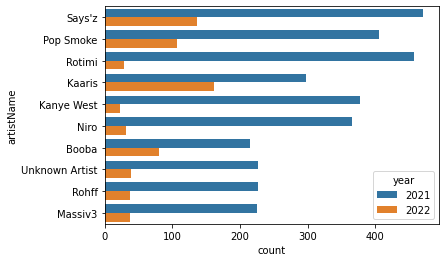

In [ ]:
ax = sns.countplot(y="artistName", data=sh, order=sh['artistName'].value_counts().iloc[:10].index, hue='year')
ax

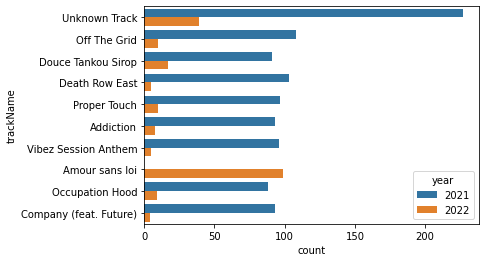

In [ ]:
ax = sns.countplot(y="trackName", data=sh, order=sh['trackName'].value_counts().iloc[:10].index, hue='year')
ax